### Case Study: How can a Wellness Technology Company Play it Smart?

### In the Process stage we will take steps to ensure the integrity of the data and ensure the data is clean. Once completed the data will be ready for analysis.

Key Tasks:

- Check the data for errors and missing values
- Format columns
- Remove duplicates
- Merge, transform and manipulate the data so it can be analyzed effectively
- Document the cleaning process


Data Source:

FitBit Fitness Tracker Data: https://www.kaggle.com/datasets/arashnic/fitbit

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, date, time
import seaborn as sns

In [4]:
dailyActivity = pd.read_csv("data/dailyActivity_merged.csv")
dailyActivity.head(2)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797


In [5]:
# variable types
dailyActivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [7]:
# Missing values

# print(dailyActivity.isnull().any())
print(dailyActivity.isnull().values.any())


False


In [8]:
# Number of days in the data range

# len(dailyActivity['ActivityDate'].value_counts()) # using value_counts()
print(len(dailyActivity["ActivityDate"].unique()), "days of data")

31 days of data


In [7]:
# Number of users
print("Unique Ids =",len(dailyActivity["Id"].unique()))

Unique Ids = 33


In [10]:
# Change the Data column to a datetime format
dailyActivity["ActivityDate"] = pd.to_datetime(dailyActivity["ActivityDate"])

In [11]:
dailyActivity.head(2)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797


In [10]:
# Date range
print("Dates range from", dailyActivity["ActivityDate"].min(), "and", dailyActivity["ActivityDate"].max())range is small

Dates range from 2016-04-12 00:00:00 and 2016-05-12 00:00:00


**dailyActivity Obervations:**
- Id is an integer. We can change to a category (for plotting purposes) ?
- ActivityDate is an object - changed the date to a date format.
- There are 33 unique Ids
- There is no missing values
- Date ranges from 12th April to 12th May
- There are 31 days of activity data within the range
- TotalDistance & TrackerDistance is almost identical - we will remove TrackerDistance column.
- Approximately 4 participants have loggedActivitiesDistance entries, totaling 31 rows only.  




In [12]:
# Remove TrackerDistance column
dailyActivity.drop('TrackerDistance', axis=1, inplace=True)

==============================================================================================


In [13]:
# import sleep data
sleepDay = pd.read_csv("data/sleepDay_merged.csv")
sleepDay.head(2)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407


SleepDay Column Details:

- SleepDay: Date on which the sleep event started.
- TotalSleepRecords: Number of recorded sleep periods for that day. Includes naps > 60min
- TotalMinutesAsleep: Total number of minutes classified as being “asleep”.
- TotalTimeInBed: Total minutes spent in bed, including asleep restless, and awake, that occurred   during a defined sleep record.

In [14]:
sleepDay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [14]:
# NAs
print(sleepDay.isnull().any())

Id                    False
SleepDay              False
TotalSleepRecords     False
TotalMinutesAsleep    False
TotalTimeInBed        False
dtype: bool


In [15]:
# Change the Data column to a datetime format
sleepDay["SleepDay"] = pd.to_datetime(sleepDay["SleepDay"])

In [16]:
# Summary

print(len(sleepDay["SleepDay"].unique()), "days of data")
print("Unique Ids =",len(sleepDay["Id"].unique()))
print("Dates range from", sleepDay["SleepDay"].min(), "and", sleepDay["SleepDay"].max())
print("No. of duplicates: ",len(sleepDay[sleepDay.duplicated()]))

31 days of data
Unique Ids = 24
Dates range from 2016-04-12 00:00:00 and 2016-05-12 00:00:00
No. of duplicates:  3


In [17]:
# Show duplicates
sleepDay[sleepDay.duplicated()]

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
161,4388161847,2016-05-05,1,471,495
223,4702921684,2016-05-07,1,520,543
380,8378563200,2016-04-25,1,388,402


**Data Observations:** 
- There are no missing values
- sleepDay is an object - changed the date to date format
- sleepDay and dailyActivity files both have 31 days of data
- RangeIndex: dailyActivity = 940 entries; sleepDay = 413 entries
- sleepDay and dailyActivity files both have the same date range (12th April to 12th May)
- sleepDaya has less participants (24) than dailyActivity (33)
- 3 x duplicates 

**Next Steps:**
- Remove Duplicates
- Merge the sleepDay data with dailyActivity - note, there are only 24 participants in sleepDay so if merging with an "outer join", there will be 33 participants but 13 participants will not have sleep records.
- As another option, we can merge the sleepDay with dailyActivity using "inner join" giving us a dataset of only 24 participants.  
- Create new cleaned & merged csv files


In [18]:
# Remove duplicate rows
sleepDay.drop_duplicates(inplace=True)

In [19]:
# Check for NAs
print("No. of duplicates: ",len(sleepDay[sleepDay.duplicated()]))

No. of duplicates:  0


In [20]:
# To standardise date column name, rename the "SleepDay" to "ActivityDate"
sleepDay.rename(columns={'SleepDay':'ActivityDate'}, inplace=True)

In [21]:
# merge the dailyActivity file and the sleepDay file (outer join)
act_sleepDay_left = pd.merge(dailyActivity, sleepDay, how='left', on=['Id', 'ActivityDate'])

In [22]:
act_sleepDay_left.head(3)

,Id,ActivityDate,TotalSteps,TotalDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1.0,327.0,346.0
1,1503960366,2016-04-13,10735,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,2.0,384.0,407.0
2,1503960366,2016-04-14,10460,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,NaN,NaN,NaN


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

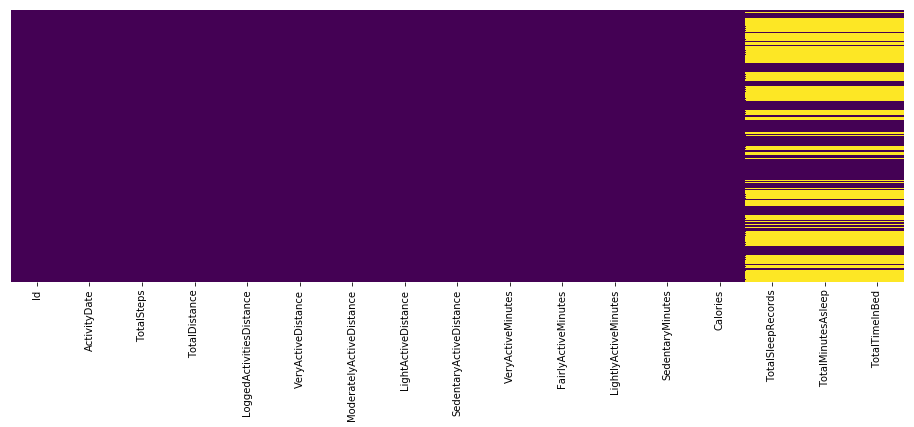

In [23]:
# Check for NAs
plt.figure(figsize=(16, 5))
sns.heatmap(act_sleepDay_left.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [24]:
# Missing values after merge
vars_with_na = [var for var in act_sleepDay_left.columns if act_sleepDay_left[var].isnull().sum()]
for var in vars_with_na:
    print(var, np.round(act_sleepDay_left[var].isnull().mean(), 3),  ' % missing values')

TotalSleepRecords 0.564  % missing values
TotalMinutesAsleep 0.564  % missing values
TotalTimeInBed 0.564  % missing values


In [24]:
# merge the dailyActivity file and the sleepDay file (inner join)
act_sleepDay_inner = pd.merge(dailyActivity, sleepDay, how='inner', on=['Id', 'ActivityDate'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

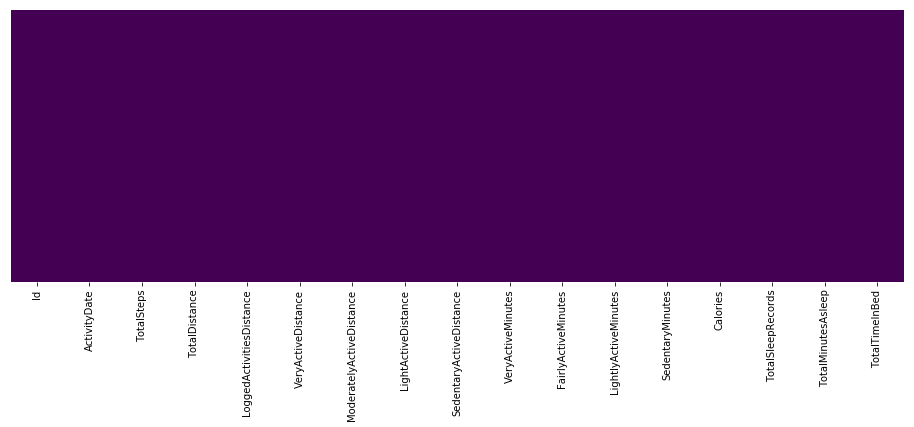

In [25]:
# Check for NAs
plt.figure(figsize=(16, 5))
sns.heatmap(act_sleepDay_inner.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [26]:
# Create new cleaned & merged csv files
act_sleepDay_left.to_csv("clean_data/act_sleepDay_left.csv", index=False)
act_sleepDay_inner.to_csv("clean_data/act_sleepDay_inner.csv", index=False)
dailyActivity.to_csv("clean_data/dailyActivity.csv", index=False)
sleepDay.to_csv("clean_data/sleepDay.csv", index=False)

***Check out Hourly files***


In [27]:
# import file
hrCals = pd.read_csv("data/hourlyCalories_merged.csv")
print(hrCals.head(2))

           Id           ActivityHour  Calories
0  1503960366  4/12/2016 12:00:00 AM        81
1  1503960366   4/12/2016 1:00:00 AM        61


In [28]:
hrCals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [29]:
hrCals.isnull().any()

Id              False
ActivityHour    False
Calories        False
dtype: bool

In [30]:
# import Hourly Intensities
hrIntens = pd.read_csv("data/hourlyIntensities_merged.csv")
print(hrIntens.head(2))

           Id           ActivityHour  TotalIntensity  AverageIntensity
0  1503960366  4/12/2016 12:00:00 AM              20          0.333333
1  1503960366   4/12/2016 1:00:00 AM               8          0.133333


Hourly Intensities column details:

- AverageIntensity = Average intensity state exhibited during that
hour (TotalIntensity for that ActivityHour divided
by 60)
- TotalIntensity = Value calculated by adding all the minute-level
intensity values that occurred within the hour


In [31]:
hrIntens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB


In [32]:
hrIntens.isnull().any()

Id                  False
ActivityHour        False
TotalIntensity      False
AverageIntensity    False
dtype: bool

In [33]:
# import Hourly Steps
hrSteps = pd.read_csv("data/hourlySteps_merged.csv")
print(hrSteps.head(2))

           Id           ActivityHour  StepTotal
0  1503960366  4/12/2016 12:00:00 AM        373
1  1503960366   4/12/2016 1:00:00 AM        160


In [34]:
hrSteps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [35]:
hrSteps.isnull().any()

Id              False
ActivityHour    False
StepTotal       False
dtype: bool

In [36]:
# Number of Users
print("Calories has", len(hrCals['Id'].unique()), "unique Ids")
print("Intensity has", len(hrIntens['Id'].unique()), "unique Ids")
print("Steps has", len(hrSteps['Id'].unique()), "unique Ids")

Calories has 33 unique Ids
Intensity has 33 unique Ids
Steps has 33 unique Ids


In [37]:
# Number of observations
print("Calories has", len(hrCals["ActivityHour"].unique()), "observations")
print("Intensity has", len(hrIntens["ActivityHour"].unique()), "observations")
print("Steps has", len(hrSteps["ActivityHour"].unique()), "observations")

Calories has 736 observations
Intensity has 736 observations
Steps has 736 observations


In [38]:
# Change Date object to Date format
hrCals["ActivityHour"] = pd.to_datetime(hrCals["ActivityHour"])
hrIntens["ActivityHour"] = pd.to_datetime(hrIntens["ActivityHour"])
hrSteps["ActivityHour"] = pd.to_datetime(hrSteps["ActivityHour"])

In [39]:
# Date range
print("For Calories dates range from", hrCals["ActivityHour"].min(), "and", hrCals["ActivityHour"].max())
print("For Intensity dates range from", hrIntens["ActivityHour"].min(), "and", hrIntens["ActivityHour"].max())
print("For Steps dates range from", hrSteps["ActivityHour"].min(), "and", hrSteps["ActivityHour"].max())

For Calories dates range from 2016-04-12 00:00:00 and 2016-05-12 15:00:00
For Intensity dates range from 2016-04-12 00:00:00 and 2016-05-12 15:00:00
For Steps dates range from 2016-04-12 00:00:00 and 2016-05-12 15:00:00


**Data Observations:**
For Calories, Intensity and Steps files:
- Id is an integer. We can change to a category (for plotting purposes)
- ActivityHour is an object. Changed to a date object.
- There are 33 unique Ids in all hourly files
- There are no missing values
- Date ranges from 12th April to 12th May (2016)
- There are 736 observations within the date range for each Id

**Next:**
- Merge the Calaries, Intensity and Steps hourly files
- Check for duplicates
- Create new cleaned & merged csv file



***Merge the hourly Calories, Intensity and Steps datasets***

In [40]:
# Merge Calories and Intensity
hr_merge = pd.merge(hrCals, hrIntens, how='inner', on=['Id', 'ActivityHour'])

In [41]:
hr_merge.head(2)

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity
0,1503960366,2016-04-12 00:00:00,81,20,0.333333
1,1503960366,2016-04-12 01:00:00,61,8,0.133333


In [42]:
# merge Steps
hr_merge = pd.merge(hr_merge, hrSteps, how='inner', on=['Id', 'ActivityHour'])

In [44]:
hr_merge.head(3)

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,StepTotal
0,1503960366,2016-04-12 00:00:00,81,20,0.333333,373
1,1503960366,2016-04-12 01:00:00,61,8,0.133333,160
2,1503960366,2016-04-12 02:00:00,59,7,0.116667,151


***Check for duplicates***


In [45]:
print("No. of duplicates: ",len(hr_merge[hr_merge.duplicated()]))

No. of duplicates:  0


In [46]:
# Generate clean csv file
hr_merge.to_csv("clean_data/hr_merge.csv")
hrCals.to_csv("clean_data/hrCals.csv")
hrIntens.to_csv("clean_data/hrIntens.csv")
hrSteps.to_csv("clean_data/hrSteps.csv")

**Check out Minute Files**

In [47]:
# import Minutes Calories
minCals = pd.read_csv("data/minuteCaloriesNarrow_merged.csv")
minCals.head(2)

,Id,ActivityMinute,Calories
0,1503960366,4/12/2016 12:00:00 AM,0.7865
1,1503960366,4/12/2016 12:01:00 AM,0.7865


In [48]:
minCals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Id              1325580 non-null  int64  
 1   ActivityMinute  1325580 non-null  object 
 2   Calories        1325580 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 30.3+ MB


In [49]:
print("Missing values: ",minCals.isnull().values.sum())
print("No. of duplicates: ",len(minCals[minCals.duplicated()]))

Missing values:  0
No. of duplicates:  0


In [51]:
# Import Minutes Intensities
minIntens = pd.read_csv("data/minuteIntensitiesNarrow_merged.csv")
minIntens.head(2)

,Id,ActivityMinute,Intensity
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0


Notes: Intensity value:
    
0 = Sedentary
1 = Light
2 = Moderate
3 = Very Active

In [52]:
minIntens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Id              1325580 non-null  int64 
 1   ActivityMinute  1325580 non-null  object
 2   Intensity       1325580 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 30.3+ MB


In [53]:
print("Missing values: ",minIntens.isnull().values.sum())
print("No. of duplicates: ",len(minIntens[minIntens.duplicated()]))

Missing values:  0
No. of duplicates:  0


In [55]:
# Import Minutes Steps
minSteps = pd.read_csv("data/minuteStepsNarrow_merged.csv")
minSteps.head(2)

,Id,ActivityMinute,Steps
0,1503960366,4/12/2016 12:00:00 AM,0
1,1503960366,4/12/2016 12:01:00 AM,0


In [56]:
minSteps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Id              1325580 non-null  int64 
 1   ActivityMinute  1325580 non-null  object
 2   Steps           1325580 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 30.3+ MB


In [57]:
print("Missing values: ",minSteps.isnull().values.sum())
print("No. of duplicates: ",len(minSteps[minSteps.duplicated()]))

Missing values:  0
No. of duplicates:  0


In [58]:
# Import Minutes METs
minMETs = pd.read_csv("data/minuteMETsNarrow_merged.csv")
minMETs.head(2)

,Id,ActivityMinute,METs
0,1503960366,4/12/2016 12:00:00 AM,10
1,1503960366,4/12/2016 12:01:00 AM,10


**METs** = metabolic equivalents.

One MET is defined as the energy you use when you’re resting or sitting still.

An activity that has a value of 4 METs means you’re exerting four times the energy than you would if you were sitting still.

The MET level is higher as the intensity of your activity increases. For example, 2.5 METs is the amount of energy used each minute to walk leisurely,
 but that goes up to 5 METs when walking very briskly at 4 mph. You are burning 5 times as many calories per minute when walking briskly as sitting quietly.


In [59]:
minMETs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1325580 entries, 0 to 1325579
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Id              1325580 non-null  int64 
 1   ActivityMinute  1325580 non-null  object
 2   METs            1325580 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 30.3+ MB


In [60]:
print("Missing values: ",minMETs.isnull().values.sum())
print("No. of duplicates: ",len(minMETs[minMETs.duplicated()]))

Missing values:  0
No. of duplicates:  0


In [61]:
# Change to date format
minCals["ActivityMinute"] = pd.to_datetime(minCals["ActivityMinute"])
minIntens["ActivityMinute"] = pd.to_datetime(minIntens["ActivityMinute"])
minSteps["ActivityMinute"] = pd.to_datetime(minSteps["ActivityMinute"])
minMETs["ActivityMinute"] = pd.to_datetime(minMETs["ActivityMinute"])

In [62]:
# Number of Ids
print("Calories has", len(minCals['Id'].unique()), "unique Ids")
print("Intensity has", len(minIntens['Id'].unique()), "unique Ids")
print("Steps has", len(minSteps['Id'].unique()), "unique Ids")
print("METs has", len(minMETs['Id'].unique()), "unique Ids")


Calories has 33 unique Ids
Intensity has 33 unique Ids
Steps has 33 unique Ids
METs has 33 unique Ids


In [63]:
# Number of observations
print("Calories has", len(minCals["ActivityMinute"].unique()), "observations")
print("Intensity has", len(minIntens["ActivityMinute"].unique()), "observations")
print("Steps has", len(minSteps["ActivityMinute"].unique()), "observations")
print("METs has", len(minMETs["ActivityMinute"].unique()), "observations")


Calories has 44160 observations
Intensity has 44160 observations
Steps has 44160 observations
METs has 44160 observations


In [64]:
# Date range
print("For Calories dates range from", minCals["ActivityMinute"].min(), "and", minCals["ActivityMinute"].max())
print("For Intensity dates range from", minIntens["ActivityMinute"].min(), "and", minIntens["ActivityMinute"].max())
print("For Steps dates range from", minSteps["ActivityMinute"].min(), "and", minSteps["ActivityMinute"].max())
print("For METs dates range from", minMETs["ActivityMinute"].min(), "and", minMETs["ActivityMinute"].max())

For Calories dates range from 2016-04-12 00:00:00 and 2016-05-12 15:59:00
For Intensity dates range from 2016-04-12 00:00:00 and 2016-05-12 15:59:00
For Steps dates range from 2016-04-12 00:00:00 and 2016-05-12 15:59:00
For METs dates range from 2016-04-12 00:00:00 and 2016-05-12 15:59:00


**Data Observations:**
For Calories, Intensity, Steps & METs files:
- ActivityMinute is an object - Changed to a date object.
- There are 33 unique Ids in all minute files
- There are no missing values
- Date ranges from 12th April to 12th May (2016)
- There are 44160 unique observations (rows) in each file

**Next:**
- Merge the Calaries, Intensity, Steps and METs minute files
- Check for duplicates
- Create clean merged csv file, including with Heart Rate 

****Merge files****

In [63]:
# Merge Calories and Intensity
min_merge = pd.merge(minCals, minIntens, how='inner', on=['Id', 'ActivityMinute'])

In [64]:
# Merge Steps
min_merge = pd.merge(min_merge, minSteps, how='inner', on=['Id', 'ActivityMinute'])

In [65]:
# Merge METs
min_merge = pd.merge(min_merge, minMETs, how='inner', on=['Id', 'ActivityMinute'])

In [66]:
min_merge.head(2)

,Id,ActivityMinute,Calories,Intensity,Steps,METs
0,1503960366,2016-04-12 00:00:00,0.7865,0,0,10
1,1503960366,2016-04-12 00:01:00,0.7865,0,0,10


In [67]:
# Check for duplicates
print("No. of duplicates: ",len(min_merge[min_merge.duplicated()]))

No. of duplicates:  0


In [68]:
# Set the date to index
min_merge.set_index("ActivityMinute", inplace=True)

In [69]:
# break the date down into it's individual date components (Month,Day,Hour,Min)
min_merge['Month'] = min_merge.index.month
min_merge["Day"] = min_merge.index.day
min_merge["Hour"] = min_merge.index.hour
min_merge["Min"] = min_merge.index.minute

In [70]:
min_merge.head(3)

,Id,Calories,Intensity,Steps,METs,Month,Day,Hour,Min
ActivityMinute,,,,,,,,,
2016-04-12 00:00:00,1503960366,0.7865,0,0,10,4,12,0,0
2016-04-12 00:01:00,1503960366,0.7865,0,0,10,4,12,0,1
2016-04-12 00:02:00,1503960366,0.7865,0,0,10,4,12,0,2


In [71]:
# Output files
min_merge.to_csv("clean_data\min_merge.csv")
minCals.to_csv("clean_data\minCals.csv")
minIntens.to_csv("clean_data\minIntens.csv")
minSteps.to_csv("clean_data\minSteps.csv")
minMETs.to_csv("clean_data\minMETs.csv")

**--------------------------------------------------------------------------------------------------------------------------------------------------------**

**Heart Rate**

In [72]:
# Import Heat Rate data
HR = pd.read_csv("data/heartrate_seconds_merged.csv")
HR.head(2)

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102


Notes:
    
Value = Mean heart rate value

In [73]:
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


In [74]:
print("Missing values: ",HR.isnull().values.sum())
print("No. of duplicates: ",len(HR[HR.duplicated()]))

Missing values:  0
No. of duplicates:  0


In [75]:
# Set Time to datetime format
HR["Time"] = pd.to_datetime(HR["Time"])

In [127]:
# Summary
print("Heart Rate has", len(HR['Id'].unique()), "unique Ids")
print("Heart Rate has", len(HR["Time"].unique()), "observations")
print("Heart Rate dates range from", HR["Time"].min(), "and", HR["Time"].max())

Heart Rate has 14 unique Ids
Heart Rate has 961274 observations
Heart Rate dates range from 2016-04-12 00:00:00 and 2016-05-12 16:20:00


**Data Observations:**
- Time is an object. Changed to a date object.
- There are ***only 14*** unique Ids 
- There are no missing values
- Date ranges from 12th April to 12th May (2016)
- There are 961274 observations within the date range for each Id
- There are no duplicates

**Next:**
- In order to improve HR analysis and gain additional insights, we can calculate average heart rate per minute and then merge this data with the other minutes data set (min_merge).
- Generate cleaned & merged csv file



In [76]:
# Set date as index
HR.set_index('Time',inplace=True)

In [77]:
# break the date down into it's individual date components (Month,Day,Hour,Min)
HR['Month'] = HR.index.month
HR["Day"] = HR.index.day
HR["Hour"] = HR.index.hour
HR["Min"] = HR.index.minute

In [79]:
HR.head(2)

,Id,Value,Month,Day,Hour,Min
Time,,,,,,
2016-04-12 07:21:00,2022484408,97,4,12,7,21
2016-04-12 07:21:05,2022484408,102,4,12,7,21


In [80]:
# Rename column "Value" to "HRate"
HR.rename(columns={'Value':'meanHR'}, inplace=True)

In [81]:
# Group columns and calculate the Average Heart Rate for each minute.
# Then reset the index to reform the data frame.
HR_groupby = HR.groupby(["Id", "Month", "Day", "Hour", "Min"])["meanHR"].mean().reset_index()

In [82]:
HR_groupby.head(4)

,Id,Month,Day,Hour,Min,meanHR
0,2022484408,4,12,7,21,101.600000
1,2022484408,4,12,7,22,87.888889
2,2022484408,4,12,7,23,58.000000
3,2022484408,4,12,7,24,58.000000


**Merge (inner join) Heart rate data with the minutes data (min_merge)**

In [83]:
min_merge.head(2)

,Id,Calories,Intensity,Steps,METs,Month,Day,Hour,Min
ActivityMinute,,,,,,,,,
2016-04-12 00:00:00,1503960366,0.7865,0,0,10,4,12,0,0
2016-04-12 00:01:00,1503960366,0.7865,0,0,10,4,12,0,1


In [84]:
# merge min_merge and HR_groupby to Id, Month, Day, Hour & Minute
min_HR_inner = pd.merge(min_merge, HR_groupby, how='inner', on=['Id', 'Month', 'Day', 'Hour', 'Min'])

<IPython.core.display.Javascript object>

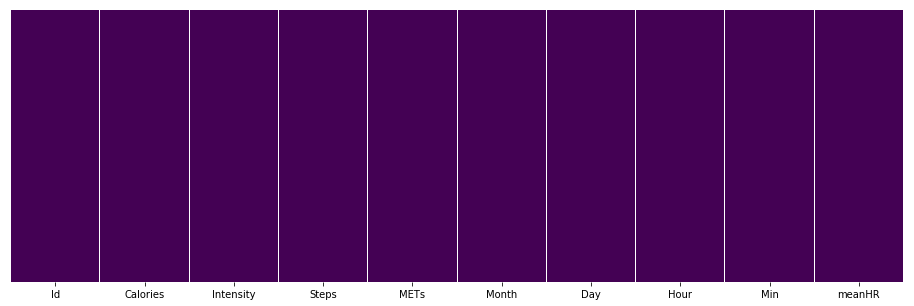

In [85]:
# Check for NAs
plt.figure(figsize=(16, 5))
sns.heatmap(min_HR_inner.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [86]:
min_HR_inner.head(2)

,Id,Calories,Intensity,Steps,METs,Month,Day,Hour,Min,meanHR
0,2022484408,3.32064,1,17,32,4,12,7,21,101.600000
1,2022484408,3.94326,1,9,38,4,12,7,22,87.888889


In [87]:
print("Missing values: ",min_HR_inner.isnull().values.sum())
print("No. of duplicates: ",len(min_HR_inner[min_HR_inner.duplicated()]))

Missing values:  0
No. of duplicates:  0


In [88]:
# Create clean merged csv files
min_HR_inner.to_csv("clean_data/min_HR_inner.csv")
HR_groupby.to_csv("clean_data/HR_groupby.csv")

================================================================================================

In [89]:
# Import sleep state
minSleep = pd.read_csv("data\minuteSleep_merged.csv")
minSleep.head(2)

,Id,date,value,logId
0,1503960366,4/12/2016 2:47:30 AM,3,11380564589
1,1503960366,4/12/2016 2:48:30 AM,2,11380564589


In [90]:
minSleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188521 entries, 0 to 188520
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Id      188521 non-null  int64 
 1   date    188521 non-null  object
 2   value   188521 non-null  int64 
 3   logId   188521 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 5.8+ MB


***Note***

Value indicating the sleep state.
1 = asleep, 2 = restless, 3 = awake

In [91]:
# Change to date format
minSleep["date"] = pd.to_datetime(minSleep["date"])

In [92]:
print("Missing values: ",minSleep.isnull().values.sum())
print("No. of duplicates: ",len(minSleep[minSleep.duplicated()]))

Missing values:  0
No. of duplicates:  543


In [93]:
# Summary
print("minuteSleep has", len(minSleep['Id'].unique()), "unique Ids")
print("minuteSleep has", len(minSleep["date"].unique()), "observations")
print("For minuteSleep dates range from", minSleep["date"].min(), "and", minSleep["date"].max())

minuteSleep has 24 unique Ids
minuteSleep has 49773 observations
For minuteSleep dates range from 2016-04-11 20:48:00 and 2016-05-12 09:56:00


**Data Observations:**
- Time is an object - changed to a date object.
- There are 24 unique Ids 
- There are no missing values
- Date ranges from 11th April to 12th May (2016)
- There are 49773 observations within the date range for each Id
- There are 543 duplicates

**Next:**
- Remove duplicates
- Remove logld column. Does not add anything to analysis insights
- Rename "value" to more descriptive name.
- merge the data with the previous minute merge file
- Generate cleaned & merged csv file


In [94]:
# Remove duplicate rows
minSleep.drop_duplicates(inplace=True)

In [95]:
# Remove logld column
minSleep.drop('logId', axis=1, inplace=True)

In [96]:
# Check duplicates removed
print("No. of duplicates: ",len(minSleep[minSleep.duplicated()]))

No. of duplicates:  0


In [97]:
# # Rename column "Value" to "State"
minSleep.rename(columns={'value':'State'}, inplace=True)

In [98]:
# Set date to index
minSleep.set_index('date',inplace=True)

In [99]:
# break the date down into it's individual date components (Month,Day,Hour,Min)
minSleep['Month'] = minSleep.index.month
minSleep["Day"] = minSleep.index.day
minSleep["Hour"] = minSleep.index.hour
minSleep["Min"] = minSleep.index.minute

In [100]:
min_merge.head(2)

,Id,Calories,Intensity,Steps,METs,Month,Day,Hour,Min
ActivityMinute,,,,,,,,,
2016-04-12 00:00:00,1503960366,0.7865,0,0,10,4,12,0,0
2016-04-12 00:01:00,1503960366,0.7865,0,0,10,4,12,0,1


In [101]:
# reset the index before merging
min_merge = min_merge.reset_index(level=0)

In [102]:
min_merge.head(2)

,ActivityMinute,Id,Calories,Intensity,Steps,METs,Month,Day,Hour,Min
0,2016-04-12 00:00:00,1503960366,0.7865,0,0,10,4,12,0,0
1,2016-04-12 00:01:00,1503960366,0.7865,0,0,10,4,12,0,1


In [103]:
minSleep.head(2)

,Id,State,Month,Day,Hour,Min
date,,,,,,
2016-04-12 02:47:30,1503960366,3,4,12,2,47
2016-04-12 02:48:30,1503960366,2,4,12,2,48


In [104]:
# merge min_merge and minSleep on data Id, Month, Day, Hour & Minute
min_sleep_inner = pd.merge(min_merge, minSleep, how='inner', on=['Id', 'Month', 'Day', 'Hour', 'Min'])

In [105]:
min_sleep_inner.head()

,ActivityMinute,Id,Calories,Intensity,Steps,METs,Month,Day,Hour,Min,State
0,2016-04-12 02:47:00,1503960366,0.9438,0,0,12,4,12,2,47,3
1,2016-04-12 02:48:00,1503960366,0.7865,0,0,10,4,12,2,48,2
2,2016-04-12 02:49:00,1503960366,0.7865,0,0,10,4,12,2,49,1
3,2016-04-12 02:50:00,1503960366,0.7865,0,0,10,4,12,2,50,1
4,2016-04-12 02:51:00,1503960366,0.7865,0,0,10,4,12,2,51,1


<IPython.core.display.Javascript object>

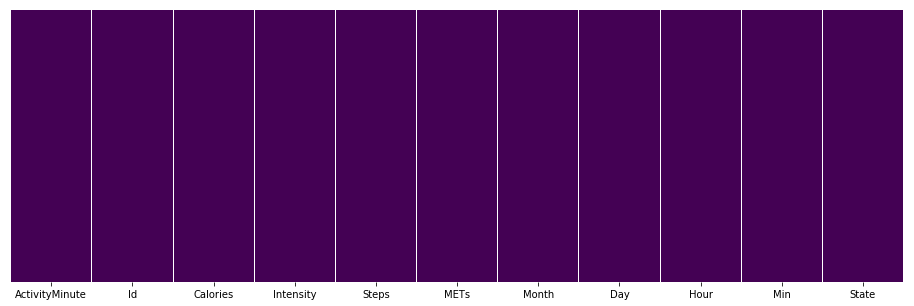

In [106]:
# Check for NAs
plt.figure(figsize=(16, 5))
sns.heatmap(min_sleep_inner.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [107]:
# Create clean merged csv file
min_sleep_inner.to_csv("clean_data/min_sleep_inner.csv")
minSleep.to_csv("clean_data/minSleep.csv")

***Merge min_merge, minSleep and HR left***

In [108]:
# merge min_merge_inner and HR_groupby on data Id, Month, Day, Hour & Minute
min_sleep_HR_inner = pd.merge(min_sleep_inner, HR_groupby, how='inner', on=['Id', 'Month', 'Day', 'Hour', 'Min'])

In [109]:
min_sleep_HR_inner.head(2)

,ActivityMinute,Id,Calories,Intensity,Steps,METs,Month,Day,Hour,Min,State,meanHR
0,2016-04-12 22:05:00,2347167796,0.94060,0,0,10,4,12,22,5,3,76.666667
1,2016-04-12 22:06:00,2347167796,1.03466,0,0,11,4,12,22,6,3,76.666667


<IPython.core.display.Javascript object>

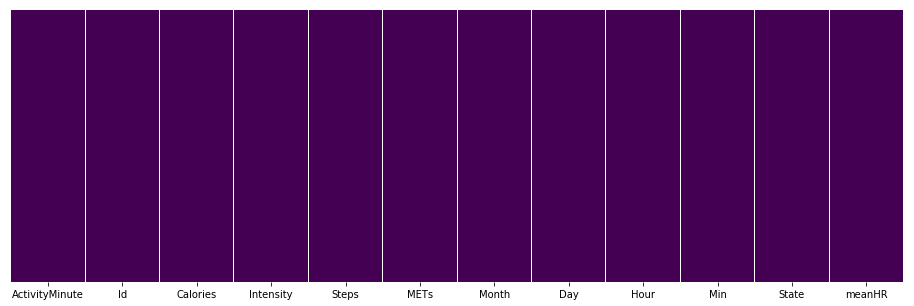

In [110]:
# Check for NAs
plt.figure(figsize=(16, 5))
sns.heatmap(min_sleep_HR_inner.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [111]:
# Save the file
min_sleep_HR_inner.to_csv("clean_data/min_sleep_HR_inner.csv")

#### Summary of Transformations
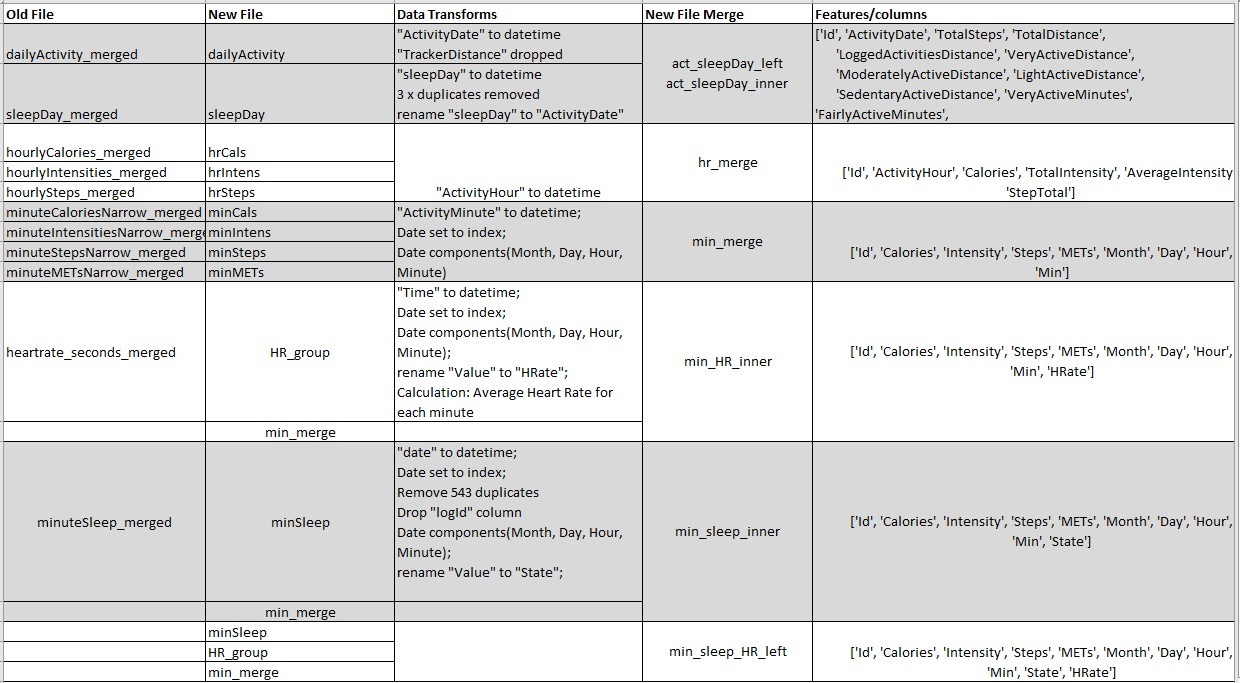